In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [31]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [33]:
X = data.drop('churn', axis=1)
Y = data['churn']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
Y_train.head()

9254    0
1561    0
1670    1
6087    1
6669    1
Name: churn, dtype: int64

In [36]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_features),
                  ('cat', OneHotEncoder(), categorical_features)])

X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
def model_evaluation (model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    confusion = confusion_matrix(Y_test, Y_pred)
    return accuracy, precision, recall, f1, confusion

In [41]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train, Y_train)
logisticreg_accuracy, logisticreg_precision, logisticreg_recall, logisticreg_f1, logisticreg_confusion = model_evaluation(logisticreg, X_test, Y_test)

In [42]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree_accuracy, dtree_precision, dtree_recall, dtree_f1, dtree_confusion = model_evaluation(dtree, X_test, Y_test)

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_confusion = model_evaluation(rf, X_test, Y_test)

In [44]:
svm = SVC()
svm.fit(X_train, Y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_confusion = model_evaluation(svm, X_test, Y_test)

In [45]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_accuracy, gb_precision, gb_recall, gb_f1, gb_confusion = model_evaluation(gb, X_test, Y_test)

In [46]:
import matplotlib.pyplot as plt

In [48]:
metrics_data = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [logisticreg_accuracy, dtree_accuracy, rf_accuracy, svm_accuracy, gb_accuracy],
    'Precision': [logisticreg_precision, dtree_precision, rf_precision, svm_precision, gb_precision],
    'Recall': [logisticreg_recall, dtree_recall, rf_recall, svm_recall, gb_recall],
    'F1-score': [logisticreg_f1, dtree_f1, rf_f1, svm_f1, gb_f1]
})

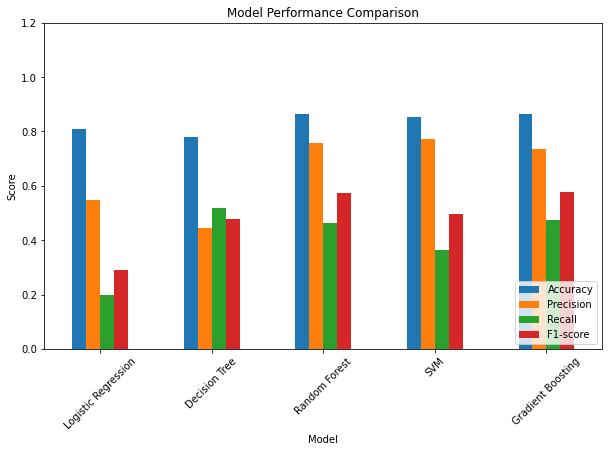

In [54]:
metrics_data.plot(x='Model', kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.2)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

In [55]:
import seaborn as sns

In [56]:
def confusionmatrix(confusion_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

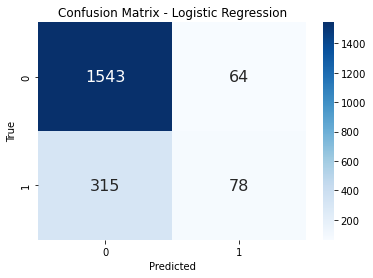

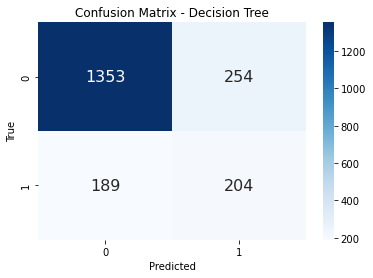

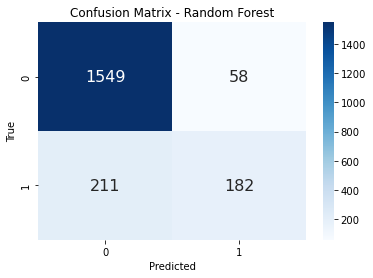

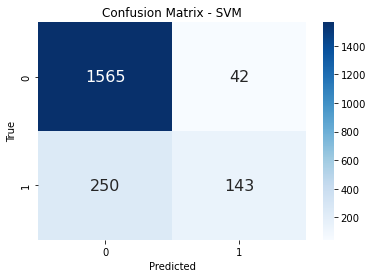

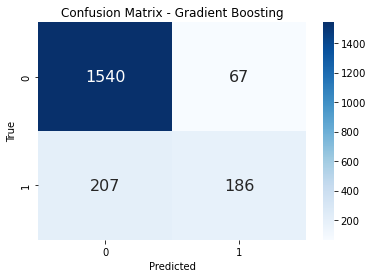

In [61]:
confusionmatrix(logisticreg_confusion, "Logistic Regression")
confusionmatrix(dtree_confusion, "Decision Tree")
confusionmatrix(rf_confusion, "Random Forest")
confusionmatrix(svm_confusion, "SVM")
confusionmatrix(gb_confusion, "Gradient Boosting")

In [67]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracy_scores = [logisticreg_accuracy, dtree_accuracy, rf_accuracy, svm_accuracy, gb_accuracy]

In [68]:
data2 = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores})

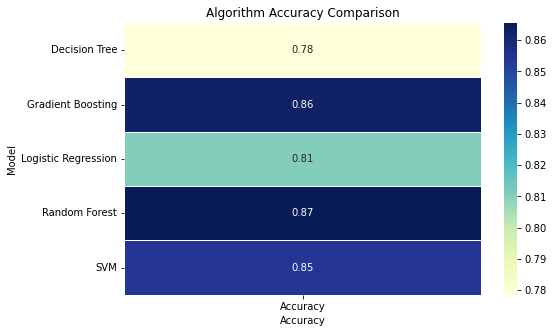

In [69]:
plt.figure(figsize=(8, 5))
sns.heatmap(data2.pivot_table(index='Model', values='Accuracy', aggfunc='mean'),
            annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()